# Analisis Visual

### **Juan Jose Gini Becker**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
nombre_archivo = '../data/retail_sales_dataset.csv'

df = pd.read_csv(nombre_archivo)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [53]:

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


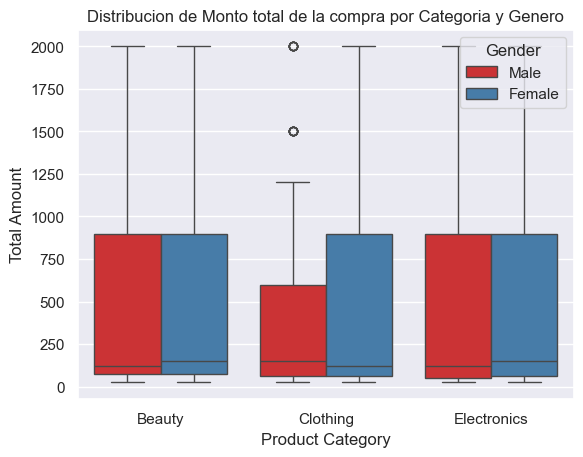

In [54]:
sns.set_theme()

sns.boxplot(data=df,
            x='Product Category',
            y='Total Amount',
            hue='Gender',
            palette='Set1')

plt.title('Distribucion de Monto total de la compra por Categoria y Genero')
plt.show()

In [57]:
# Calcular el promedio de monto total de ventas por mes y por categoria

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

temp_df = df[['Product Category', 'Total Amount', 'Year', 'Month']].groupby(['Year', 'Month', 'Product Category']).mean().round(2).reset_index()
temp_df

temp_df['Date'] = pd.to_datetime(temp_df['Month'].astype(str) + '-' + temp_df['Year'].astype(str), format='%m-%Y')

temp_df.drop(columns=['Year', 'Month'], inplace=True)

temp_df.head()

,Product Category,Total Amount,Date
0,Beauty,497.20,2023-01-01
1,Clothing,504.81,2023-01-01
2,Electronics,395.80,2023-01-01
3,Beauty,539.81,2023-02-01
4,Clothing,441.21,2023-02-01


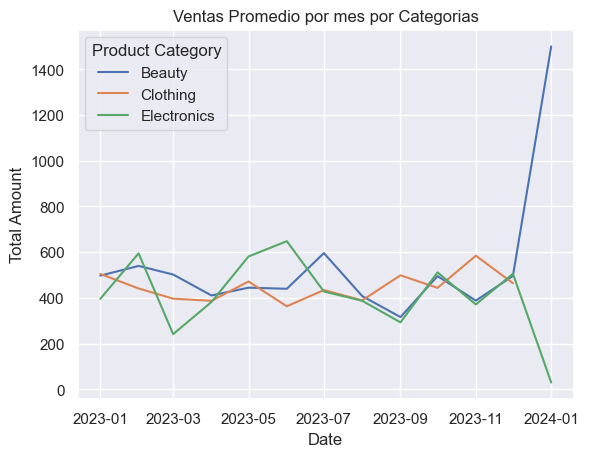

In [56]:
sns.lineplot(data=temp_df,
             x='Date',
             y='Total Amount',
             hue='Product Category')

plt.title('Ventas Promedio por mes por Categorias')
plt.show()

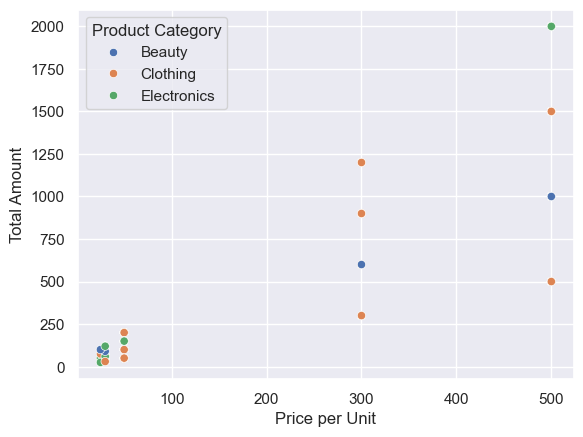

In [62]:
sns.scatterplot(data=df,
                x='Price per Unit',
                y='Total Amount',
                hue='Product Category')

plt.show()